# Loading the dependencies and libraries 

In [3]:
#### Make sure you are in the right env kernel

In [4]:
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from tableone import TableOne
# consider adding 
# import warnings
# warnings.filterwarnings("ignore")

# Loading the Data 

In [5]:
# Path to your CSV file 
csv_path = '/Users/mac/Desktop/team_02/src/post_datathon/data/pulseox_dataset.csv'

# Read the CVS file using Pandas (df: dataframe)
df_initial = pd.read_csv (csv_path, low_memory = False) # second arg ensures that pandas reads the CSV file in one go and tries to infer the data types of the columns more accurately

# Pre Processing 


Note: This section is included for reference only and will not be part of the final tutorial due to time constraints for data preprocessing during the 45-minute session. Participants will receive this notebook separately to run it, obtain the dataset, load it, and then proceed with the tutorial analysis.

In [6]:
# View the first few rows 
df_initial.head()

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0


In [7]:
# Get the column names 
column_names = df_initial.columns.tolist()
print ("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

In [8]:
# Get a summary of the DataFrame 
print(df_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Columns: 142 entries, unique_subject_id to sofa_future_renal_24hr
dtypes: bool(1), float64(122), int64(7), object(12)
memory usage: 52.9+ MB
None


In [9]:
# List of key variables to explore further
key_variables = [
    'source_db', 'comorbidity_score_value', 
    # ids 
    'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 
    'subject_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 
    # patient 
    'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission',  # BMI: Body Mass Index
    # ICU stay info 
    'datetime_icu_admit', 'datetime_icu_discharge', 'los_ICU', 'los_hospital', 
    'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 
    # Vital signs 
    'vitals_heart_rate', 
         ## MBP: Mean Blood Measure including invasive(i) and non invasive(ni)
    'vitals_mbp_i', 'vitals_mbp_ni', 
    'vitals_sbp_ni', 'vitals_sbp_i', # systolic blood pressure (SBP)
    'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 
    # LABS 
    'hfp_albumin', 
    'hfp_bilirubin_total', 'hfp_bilirubin_direct', 
    'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 
    'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 
    
    # Target 
    'in_hospital_mortality', 
    
    # Study Features 
    'SpO2', 'SaO2', 
    'comorbidity_score_value'
]

In [10]:
# Filter the dataset to only focus on the key variables relevant to the tutorial
df_key_variables = df_initial [key_variables]

In [11]:
# Visualize the columns of the new dataframe 
print(df_key_variables.columns.tolist())

['source_db', 'comorbidity_score_value', 'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_ICU', 'los_hospital', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 'in_hospital_mortality', 'SpO2', 'SaO2', 'comorbidity_score_value']


In [12]:
df_key_variables.shape

(49093, 41)

In [13]:
# Filter the Dataframe to include only the most common racial/ethnic groups
selected_groups = ['Asian','Hispanic OR Latino', 'Black', 'White']
df_filtered = df_key_variables[df_key_variables ['race_ethnicity'].apply(lambda x: x in selected_groups)].copy()

#### Handling Missing values

In [14]:
# Filter Data for Unique Patients to ensure each patient has a unique record
df_filtered = df_filtered.drop_duplicates(subset='unique_subject_id', keep='first')

Why? The goal is to ensure that each patient is represented by only one record in the dataset. This is important for statistical analyses where each data point should be independent. Multiple records for the same patient can introduce bias and inaccuracies in the analysis.

In [15]:
# Calculate the percentage of missing values per column
missing_data_percentage = df_filtered.isnull().mean() * 100 
print("Percentage of missing values per column:\n", missing_data_percentage)

Percentage of missing values per column:
 source_db                        0.000000
comorbidity_score_value          0.004847
unique_subject_id                0.000000
unique_hospital_admission_id     0.000000
unique_icustay_id                0.000000
subject_id                       0.000000
hospital_admission_id            0.000000
icustay_id                       0.000000
hospitalid                       0.000000
admission_age                    0.002424
sex_female                       0.000000
race_ethnicity                   0.000000
BMI_admission                    3.970043
datetime_icu_admit               0.000000
datetime_icu_discharge           0.000000
los_ICU                          0.000000
los_hospital                     0.000000
sofa_past_overall_24hr          23.037398
sofa_future_overall_24hr        19.372743
vitals_heart_rate               11.008507
vitals_mbp_i                    62.398507
vitals_mbp_ni                   31.818512
vitals_sbp_ni                   30

In [16]:
# Calculate percentage of missing values per column and per race
missing_data_by_race = df_filtered.groupby('race_ethnicity').apply(lambda x: x.isnull().mean() * 100)

# Transpose the table for better readability
missing_data_by_race_table = missing_data_by_race.transpose()

# Display the table using pandas styling for better readability
styled_table = missing_data_by_race_table.style.format("{:.2f}%")
styled_table

race_ethnicity,Asian,Black,Hispanic OR Latino,White
source_db,0.00%,0.00%,0.00%,0.00%
comorbidity_score_value,0.00%,0.00%,0.00%,0.01%
unique_subject_id,0.00%,0.00%,0.00%,0.00%
unique_hospital_admission_id,0.00%,0.00%,0.00%,0.00%
unique_icustay_id,0.00%,0.00%,0.00%,0.00%
subject_id,0.00%,0.00%,0.00%,0.00%
hospital_admission_id,0.00%,0.00%,0.00%,0.00%
icustay_id,0.00%,0.00%,0.00%,0.00%
hospitalid,0.00%,0.00%,0.00%,0.00%
admission_age,0.00%,0.00%,0.00%,0.00%


In [17]:
# Define Continuous and Categorical Columns

# Continuous variables
continuous_variables = [
    'admission_age', 'BMI_admission', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 
    'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_sbp_i', 
    'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 'hfp_albumin', 'hfp_bilirubin_total', 
    'hfp_bilirubin_direct', 'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 
    'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 'comorbidity_score_value'
]

# Categorical variables
categorical_vars = ['sex_female', 'race_ethnicity']

In [18]:
# define the impute function 
def impute_by_race(df, continuous_vars, categorical_vars):
    # Loop through each continuous variable
    for var in continuous_vars:
        # Impute missing values in the continuous variable by the median value within each race/ethnicity group
        df[var] = df.groupby('race_ethnicity')[var].transform(lambda x: x.fillna(x.median()))
    
    # Loop through each categorical variable
    for var in categorical_vars:
        # Impute missing values in the categorical variable by the mode (most frequent value) within each race/ethnicity group
        df[var] = df.groupby('race_ethnicity')[var].transform(lambda x: x.fillna(x.mode()[0]))
    
    # Return the dataframe with imputed values
    return df

The goal of this approach is to ensure that missing values are imputed in a way that respects the underlying distribution of the data within each race/ethnicity group. For continuous variables, we use the median to avoid the influence of outliers, while for categorical variables, we use the mode to represent the most frequent category. This method helps maintain the integrity of the data and reduces bias in subsequent analyses.

In [19]:
df_clean_imputed = impute_by_race(df_filtered, continuous_variables, categorical_vars)

In [20]:
# Remove rows where target variable 'in_hospital_mortality' is missing
df_final_clean = df_clean_imputed.dropna(subset=['in_hospital_mortality'])

In [21]:
# Check if there are any missing values left in the DataFrame
missing_data = df_final_clean.isnull().sum()
missing_columns = missing_data[missing_data > 0]

if missing_columns.empty:
    print("There are no missing values.")
else:
    print("Columns with remaining missing values:\n", missing_columns)

There are no missing values.


# Part 1: Exploratory Data Analysis (EDA) 

## Pandas profiling 

Pandas-profiling delivers an extended analysis of a DataFrame 

In [22]:
# # Pandas profiling to visualize each dataset 
# import pandas as pd
# from ydata_profiling import ProfileReport

# # Generate the profile report 
# profile = ProfileReport (df_final_clean, title = "Profile Report for Dataset")

# # Display the profile report 
# profile.to_widgets() 
# # profile.to_file("output.html") OR save the report as an HTML and view it in a web browser 


## Overview of the data using Tableone

In [23]:
# Create a new column with 'F' for female and 'M' for male
df_final_clean['sex'] = df_final_clean['sex_female'].apply(lambda x: 'F' if x == 1 else 'M')

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/3921988356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['sex'] = df_final_clean['sex_female'].apply(lambda x: 'F' if x == 1 else 'M')


In [24]:
# Specify the columns to include in the table 
columns = ['admission_age', 'BMI_admission', 'race_ethnicity', 'sex', 'in_hospital_mortality']

# Categorical Variables [ represent categories ]
categorical = ['sex', 'race_ethnicity']

# Define how to group the data for comparison
    # In this case grouping by 'in_hospital_mortality' to compare different groups based on their mortality status
groupby = ['in_hospital_mortality']

# indicates which variables are not normally distributed
    # TO CONFIRM 
    # TO DO: check that BMI_admission is actually non normal AND check the other variables with a non normal distribution and include them 
nonnormal = ['BMI_admission'] 

# Renames the variables for better readability 
labels = {
    'in_hospital_mortality': "Mortality", 
    'age': "Age", 
    'race_ethnicity': "Race and Ethnicity",
    'BMI_admission':"BMI", 
    'sex': "Sex", 
}

# Sets the order for categorical variables 
order = {
    'sex': ['F', 'M']  # 1 for Female, 0 for Male
}

# if you want you can also limit to a certain number of classes 
# limit = {
#     'sex_female': 1
# }

In [25]:
name_of_table = TableOne (
    df_final_clean, # The dataset to summariaze 
    # as defined in previous cells
    columns = columns, 
    categorical = categorical, 
    groupby = groupby, 
    nonnormal = nonnormal, 
    rename = labels, 
#     limit = limit, 
    order = order, 
    overall = True, # Whethere to include overall summary statistics 
    missing = True, # Whether to include info about the number of missing values for each variable
    pval = True, # Whether to include p-values for comparisons 
    decimals = 2, # Number of decimal places for numerical values 
)


# you can have your own table for your variables of choice! 

In [26]:
display(name_of_table)

Grouped by Mortality                                                                       
                                                          Missing              Overall                  0.0                  1.0 P-Value
n                                                                                40929                33482                 7447        
admission_age, mean (SD)                                        0        64.82 (15.72)        63.93 (15.76)        68.80 (14.92)  <0.001
BMI, median [Q1,Q3]                                             0  28.12 [24.04,33.21]  28.12 [24.24,33.40]  27.46 [23.07,32.09]  <0.001
Race and Ethnicity, n (%) Asian                                 0           755 (1.84)           613 (1.83)           142 (1.91)   0.335
                          Black                                           4252 (10.39)         3473 (10.37)          779 (10.46)        
                          Hispanic OR Latino                               1915 (4.68)          1538 (4.59)           377 (5.06)        
                          White                                          34007 (83.09)        27858 (83.20)         6149 (82.57)        
Sex, n (%)                F                                     0        17793 (43.47)        14491 (43.28)         3302 (44.34)   0.098
                          M                                              23136 (56.53)        18991 (56.72)         4145 (55.66)

Understanding the table: 
- Columns & Rows:
  * Missing: Number of missing values for each variable.
  * Overall: Statistics for the entire dataset.
  * 0.0 (No Mortality): Statistics for patients who did not die in the hospital.
  * 1.0 (Mortality): Statistics for patients who died in the hospital.
  * P-Value: Statistical significance of differences between groups.

- Variables:
  * admission_age, mean (SD): Mean age at admission with standard deviation (SD). SD measures the amount of variation or dispersion of ages.
  * BMI, median [Q1, Q3]: Median Body Mass Index (BMI) with the first quartile (Q1) and third quartile (Q3). Median represents the middle value, and quartiles divide the data into four equal parts.
  * Race and Ethnicity, n (%): Number and percentage of patients in different racial and ethnic groups.
  * Sex, n (%): Number and percentage of male and female patients.

- Grouped by Mortality:
  * Statistics for Subgroups: Compares characteristics of patients who survived (0.0) versus those who died (1.0) during their hospital stay.
  * P-Value: Indicates whether differences between the mortality groups are statistically significant. A low p-value (typically < 0.05) suggests significant differences.


## Demographic Distribution Analysis
How many patients do we have per racial-ethnic group, sex, and other demographics?

* race_ethnicity and sex_female.
* admission_age into age groups (e.g., 0-10, 11-20, etc.). 
* Group by region and numbedscategory for more context.

Goal: To understand the distribution of patients across different racial-ethnic groups, sex, and other demographics. This step sets the foundation by showing the diversity in the dataset and highlighting potential areas of interest for further analysis.

In [27]:
# Total number of patients 
total_patients = len (df_final_clean)

# Group by race_ethnicity and calculate counts and percentages 
grouped_race_ethnicity = df_final_clean['race_ethnicity'].value_counts().reset_index() # 
grouped_race_ethnicity.columns = ['race_ethnicity','count']
grouped_race_ethnicity['percentage'] = (grouped_race_ethnicity['count']/total_patients)*100


# Display the results 
print(grouped_race_ethnicity)

       race_ethnicity  count  percentage
0               White  34007   83.087786
1               Black   4252   10.388722
2  Hispanic OR Latino   1915    4.678834
3               Asian    755    1.844658


### Function to Perform the Same Operation for Any Demographic Variable

In [28]:
# Function to calculate counts and percentages for a given column

def calculate_counts_and_percentages(df, column_name):
    """
    This function calculates the count and percentage of each unique value in the specified column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame. This is your data table.
    column_name (str): The name of the column to group by. This is the specific column you want to analyze.
    
    Returns:
    pd.DataFrame: A DataFrame with counts and percentages of each unique value in the specified column.
    """

    # Step 1: Count the occurences of each unique value in the specified column and rest the index 
    grouped_df = df[column_name].value_counts().reset_index() 

    # Step 2: Rename the columns for clarity 
    grouped_df.columns = [column_name, 'count'] 

    # Step 3: Calculate the percentage of each group 
    total_count = len (df)
    grouped_df['percentage'] = (grouped_df['count']/total_count)*100

    return grouped_df
# consider having region also 

In [29]:
# Calculate counts and percentage for 'sex_female'
result_sex_female= calculate_counts_and_percentages (df_final_clean, 'sex_female')
print(result_sex_female)

   sex_female  count  percentage
0           0  23136   56.527157
1           1  17793   43.472843


In [30]:
# Create Age Groups: 
bins = [0,65,float('inf')] # Specifies the edges of the bins for the age groups (0 to 65, and 65 and above).
labels = ['<65', '>=65'] # Specifies the labels for the age groups.
df_final_clean ['age_group'] = pd.cut(df_final_clean['admission_age'], bins = bins, labels = labels) # Creates a new column age_group in the DataFrame that categorizes admission_age into the specified age ranges.

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/1927903543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['age_group'] = pd.cut(df_final_clean['admission_age'], bins = bins, labels = labels) # Creates a new column age_group in the DataFrame that categorizes admission_age into the specified age ranges.


In [31]:
df_final_clean ['age_group']

0        >=65
1        >=65
2         <65
3        >=65
4         <65
         ... 
49087    >=65
49089    >=65
49090    >=65
49091     <65
49092    >=65
Name: age_group, Length: 40929, dtype: category
Categories (2, object): ['<65' < '>=65']

In [32]:
result_age_group = calculate_counts_and_percentages(df_final_clean, 'age_group')
print(result_age_group)

  age_group  count  percentage
0      >=65  21646   52.886706
1       <65  19283   47.113294


What do you see? ... [ Identify and discuss potential biases in the data based on the demographic distribution analysis. ] 

##  Visualization of Mean Mortality per Ethnic Group 

In [33]:
# Group by 'ethnicity' and calculate the mean of 'hospital_death' for each group 
# This will give the avg mortality rate per ethnical group 
mortality_per_ethnicty = df_final_clean.groupby('race_ethnicity')['in_hospital_mortality'].mean()
print (mortality_per_ethnicty)

race_ethnicity
Asian                 0.188079
Black                 0.183208
Hispanic OR Latino    0.196867
White                 0.180816
Name: in_hospital_mortality, dtype: float64


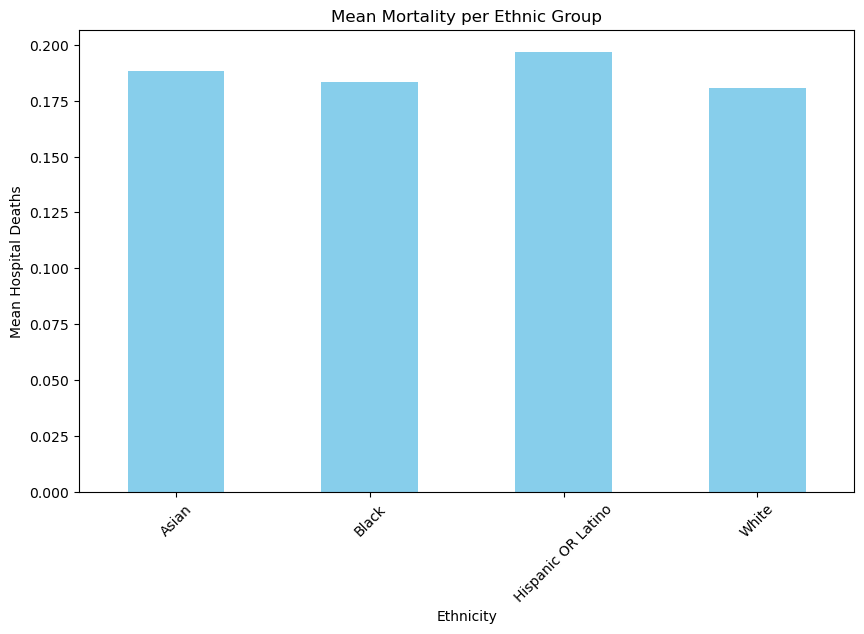

In [34]:
# Ensure matplotlib uses an inline backend
%matplotlib inline

# Create the bar plot with a specified figure size 
plt.figure (figsize =(10,6)) 

# Plot the mean mortality per ethnic group as a bar plot 
mortality_per_ethnicty.plot(kind = 'bar', color = 'skyblue') 

# Add labels and titles to the plot for a better understanding 
plt.xlabel('Ethnicity') # Label for the x-axis 
plt.ylabel('Mean Hospital Deaths') # Lable for the y-axis
plt.title('Mean Mortality per Ethnic Group') # Title of the plot

# Rotate the x-axis labels for better readability 
plt.xticks(rotation = 45) 

# Display the plot
plt.show() 

Normalizing the data by calculating the mean instead of the sum ensures that
we are comparing the mortality rates relative to the size of each ethnic group.
This is important because it allows us to see the proportional impact of mortality
across different groups, rather than choosing to plot the number of hospital deaths which is skewed by the total number of patients
in each group. This approach helps in identifying if certain groups have a disproportionately
higher or lower mortality rate, providing a clearer insight into potential biases or
disparities in the data.

## Initial Analysis of SpO2 and SaO2
* Present the statistical summary and visualize the distribution of SpO2 and SaO2 values.
* Highlight any differences in SpO2 distributions across different demographic groups (e.g., race_ethnicity, sex).

Goal: To explore the distribution of SpO2 and SaO2 values across different demographics. This step helps to identify any preliminary differences or patterns in SpO2 and SaO2 measurements among various groups.

In [35]:
# Statistical summary of SpO2 values 
Sp02_summary = df_final_clean['SpO2'].describe()
print("SpO2 summary:\n")
print(Sp02_summary.to_string())
print ("\n")

SaO2_summary = df_final_clean['SaO2'].describe()
print("SaO2 summary:\n")
print(SaO2_summary.to_string())

SpO2 summary:

count    40929.000000
mean        97.148525
std          3.830732
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000


SaO2 summary:

count    40929.000000
mean        95.949845
std          4.154299
min         70.000000
25%         94.700000
50%         97.000000
75%         99.000000
max        100.000000


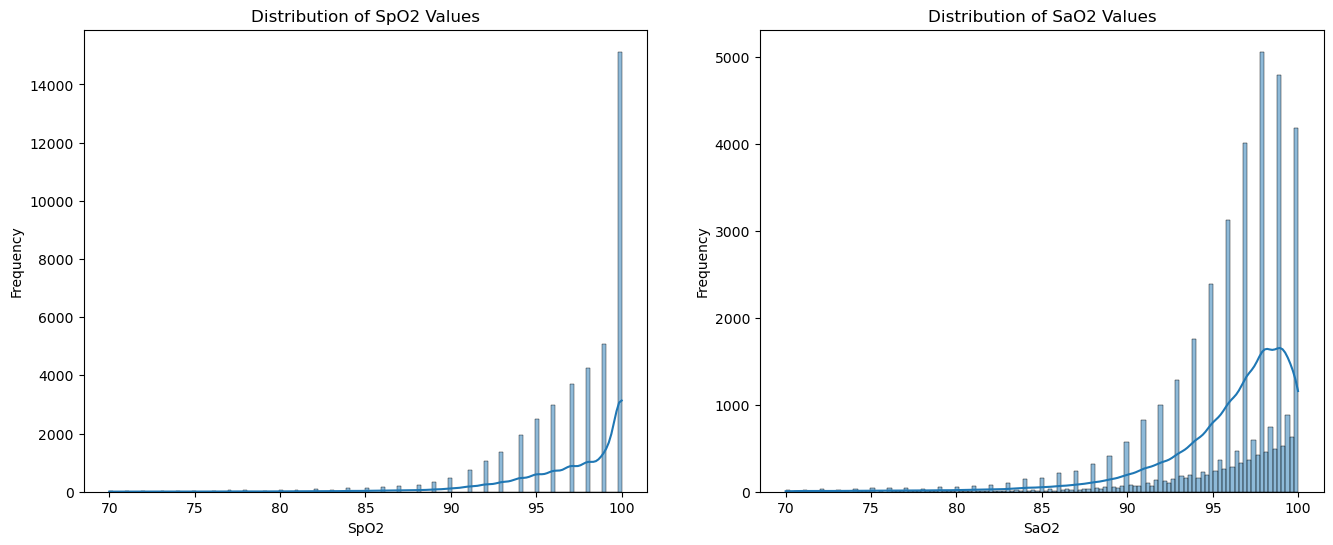

In [36]:
# Visualization of the Distribution of SpO2 values 
plt.figure(figsize=(16,6))


plt.subplot(1,2,1) # a 1-row, 2-column figure: go to the first subplot
sns.histplot(df_final_clean['SpO2'], kde = True)
plt.title ('Distribution of SpO2 Values')
plt.xlabel('SpO2')
plt.ylabel('Frequency')


# Visualization of the Distribution of SaO2 values 
plt.subplot(1,2,2)
sns.histplot(df_final_clean['SaO2'], kde = True)
plt.title ('Distribution of SaO2 Values')
plt.xlabel('SaO2')
plt.ylabel('Frequency')

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observations: 
* ...
* ...

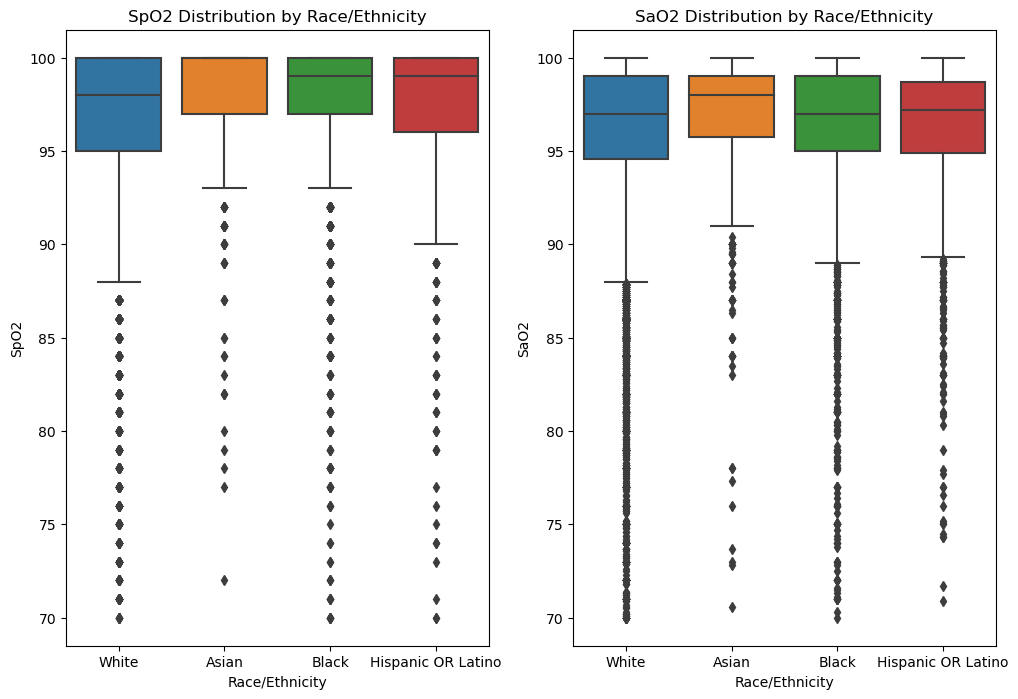

In [37]:
# Distribution of SpO2 values by race_ethnicity
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x='race_ethnicity', y='SpO2', data=df_final_clean)
plt.title('SpO2 Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('SpO2')


# Distribution of SaO2 values by race_ethnicity
plt.subplot(1,2,2)
sns.boxplot(x='race_ethnicity', y='SaO2', data=df_final_clean)
plt.title('SaO2 Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('SaO2')

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observations: 
* ...
* ...



## Analysis of Hypoxemia using SpO2 and SaO2 individually 

* Define hypoxemia using a threshold for SpO2 and SaO2.
* Compare the incidence of hypoxemia across different demographic groups.
* Highlight any disparities that may indicate bias in SpO2 measurements.

Goal: To compare SpO2 and SaO2 values side by side and examine the incidence of hypoxemia using both measurements. This step highlights the discrepancies and biases in SpO2 measurements by analyzing hypoxemia based on SaO2 measurements and compare it with SpO2-based analysis. This step emphasizes the importance of SaO2 measurements in revealing hidden hypoxemia that SpO2 alone might miss.

In [38]:
# Define Hypoxemia based on SpO2 threshold (e.g. SpO2 < 88%) and SpO2 threshold (e.g. SpO2 < 88%)
df_final_clean ['hypoxemia_SpO2'] = df_final_clean ['SpO2'] < 88 
df_final_clean ['hypoxemia_SaO2'] = df_final_clean ['SaO2'] < 88 

# Incidence of hypoxemia by race_ethnicity
hypoxemia_by_race_SpO2 = df_final_clean.groupby('race_ethnicity')['hypoxemia_SpO2'].mean().reset_index()
hypoxemia_by_race_SaO2 = df_final_clean.groupby('race_ethnicity')['hypoxemia_SaO2'].mean().reset_index()
    # The mean value represents the proportion of patients with hypoxemia in each racial/ethnic group.


hypoxemia_by_race_SpO2.columns = ['race_ethnicity', 'hypoxemia_incidence']
hypoxemia_by_race_SaO2.columns = ['race_ethnicity', 'hypoxemia_incidence']
hypoxemia_by_race_SpO2['hypoxemia_incidence'] *= 100 
hypoxemia_by_race_SaO2['hypoxemia_incidence'] *= 100 



print("SpO2:\n")
print (hypoxemia_by_race_SpO2)
print('\n')
print("SaO2:\n")
print (hypoxemia_by_race_SaO2)


SpO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             2.119205
1               Black             2.869238
2  Hispanic OR Latino             2.193211
3               White             2.805305


SaO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             3.708609
1               Black             5.620884
2  Hispanic OR Latino             3.916449
3               White             4.478490


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/2505968085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['hypoxemia_SpO2'] = df_final_clean ['SpO2'] < 88
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/2505968085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['hypoxemia_SaO2'] = df_final_clean ['SaO2'] < 88


### Hypoxemia Incidence

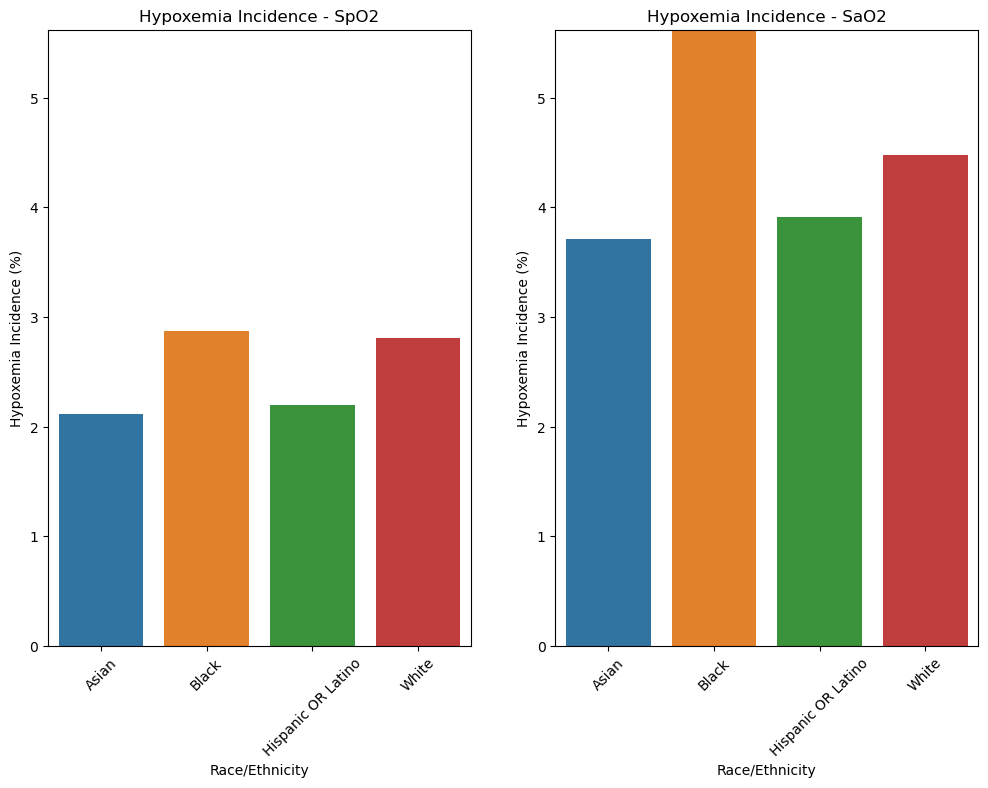

In [39]:
# Visualization 
plt.figure(figsize=(12,8))


# Define the common y-axis limit
y_max = max(hypoxemia_by_race_SpO2['hypoxemia_incidence'].max(), hypoxemia_by_race_SaO2['hypoxemia_incidence'].max())
# y_min = min(hypoxemia_by_race_SpO2['hypoxemia_incidence'].min(), hypoxemia_by_race_SaO2['hypoxemia_incidence'].min())

# a 1-row, 2-column figure: go to the first subplot 
plt.subplot(1,2,1)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SpO2)
plt.title ('Hypoxemia Incidence - SpO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)


# a 1-row, 2-column figure: go to the second subplot 
plt.subplot(1,2,2)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SaO2)
plt.title ('Hypoxemia Incidence - SaO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observation:
* The disparity between the incidence of hypoxemia based on SpO2 and SaO2 measurements  indicates that relying only on SpO2 can lead to underestimation of hypoxemia, especially in certain racial-ethnic groups.
* The analysis reveals that SaO2 measurements uncover hidden hypoxemia cases not detected by SpO2 alone. 


### Patients with both SpO2 and SaO2 measurements by race/ethnicity 
This section identifies the percentage of patients with both SpO2 and SaO2 measurements across different racial/ethnic groups. It highlights the bias introduced by the incomplete data, showing that not all patients have both measurements, which can impact the accuracy and fairness of clinical assessments across demographics.

In [40]:
# Calculate the percentage of rows with a value of 0 for SpO2 and SaO2
spO2_zero_percentage = (df_final_clean['SpO2'] == 0).mean() * 100
saO2_zero_percentage = (df_final_clean['SaO2'] == 0).mean() * 100

print(f"Percentage of rows with SpO2 = 0: {spO2_zero_percentage:.2f}%")
print(f"Percentage of rows with SaO2 = 0: {saO2_zero_percentage:.2f}%")

Percentage of rows with SpO2 = 0: 0.00%
Percentage of rows with SaO2 = 0: 0.00%


       race_ethnicity  count  percentage
0               Asian    755    1.844658
1               Black   4252   10.388722
2  Hispanic OR Latino   1915    4.678834
3               White  34007   83.087786


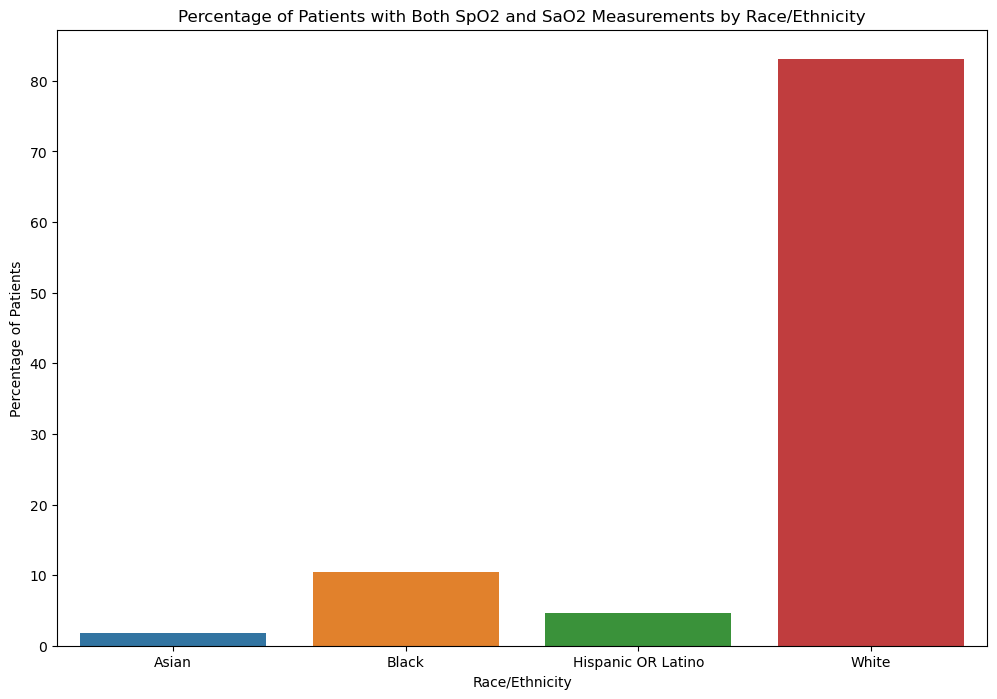

In [41]:
# Group by race_ethnicity and count the number of patients with both measurements
patients_with_both_pairs = df_final_clean.groupby('race_ethnicity').size().reset_index(name='count')

# Calculate the percentage of patients with both measurements for each racial/ethnic group
total_patients = len(df_final_clean)
patients_with_both_pairs['percentage'] = (patients_with_both_pairs['count'] / total_patients) * 100

# Display the results
print(patients_with_both_pairs)


plt.figure(figsize=(12, 8))
sns.barplot(x='race_ethnicity', y='percentage', data=patients_with_both_pairs)
plt.title('Percentage of Patients with Both SpO2 and SaO2 Measurements by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Patients')
plt.show()


Observation: Since there are no missing values in the SpO2 and SaO2 columns, the percentage distribution is primarily reflecting the demographic composition of the dataset. This analysis highlights the proportion of each racial/ethnic group that has complete SpO2 and SaO2 measurements, indicating that the dataset is predominantly composed of white patients.

Interpretation: 
* Data Representation and Bias: The disproportionate representation of white patients in the dataset might affect the detection of hypoxemia in non-white patients. Since pulse oximeters are known to be less accurate for individuals with darker skin tones, this imbalance could lead to underestimation of hypoxemia in underrepresented groups.

* Clinical Implications: If hypoxemia is not accurately detected due to demographic bias in the dataset, non-white patients might receive suboptimal care. Building models predicting hypoxemia with this dataset without a consideration of the distribution will create models biased towards the white population and will not detect many cases in black patients. This analysis highlights the need for diverse datasets to ensure equitable healthcare and accurate hypoxemia detection across all racial/ethnic groups. 

## 3. Hidden Hypoxemia
This brings us to the concept of hidden hypoxemia. Hidden hypoxemia occurs when patients exhibit low blood oxygen levels that are not detected by pulse oximetry. The accuracy issues and dataset imbalances can exacerbate this problem, particularly in non-white populations. In the next section, we will explore the prevalence of hidden hypoxemia across different racial and ethnic groups, highlighting the critical need for accurate and equitable diagnostic tools in clinical settings.


* Identify hidden hypoxemia using both SpO2 and SaO2 measurements.
* Compare the incidence of hidden hypoxemia across different demographic groups.
* Highlight how the bias in SpO2 measurements can lead to hidden hypoxemia, particularly in certain demographic groups.

Goal: To identify hidden hypoxemia (patients with normal SpO2 but low SaO2) and analyze its prevalence across different demographics. This step uncovers the hidden bias in SpO2 measurements and shows how certain groups are disproportionately affected.


### Hidden Hypoxemia - SpO2 & SaO2

In [42]:
# Identify hidden hypoxemia (SpO2 >= 88% and SaO2 < 88%)
df_final_clean['hidden_hypoxemia'] = df_final_clean.apply(lambda row: row['SpO2'] >= 88 and row['SaO2'] < 88, axis=1)

# Incidence of hidden hypoxemia by race_ethnicity
hidden_hypoxemia_by_race = df_final_clean.groupby('race_ethnicity')['hidden_hypoxemia'].mean().reset_index()
hidden_hypoxemia_by_race.columns = ['race_ethnicity', 'hidden_hypoxemia_incidence']
hidden_hypoxemia_by_race['hidden_hypoxemia_incidence'] *= 100

print(hidden_hypoxemia_by_race)

       race_ethnicity  hidden_hypoxemia_incidence
0               Asian                    2.516556
1               Black                    4.350894
2  Hispanic OR Latino                    3.028721
3               White                    3.358132


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/232903388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['hidden_hypoxemia'] = df_final_clean.apply(lambda row: row['SpO2'] >= 88 and row['SaO2'] < 88, axis=1)


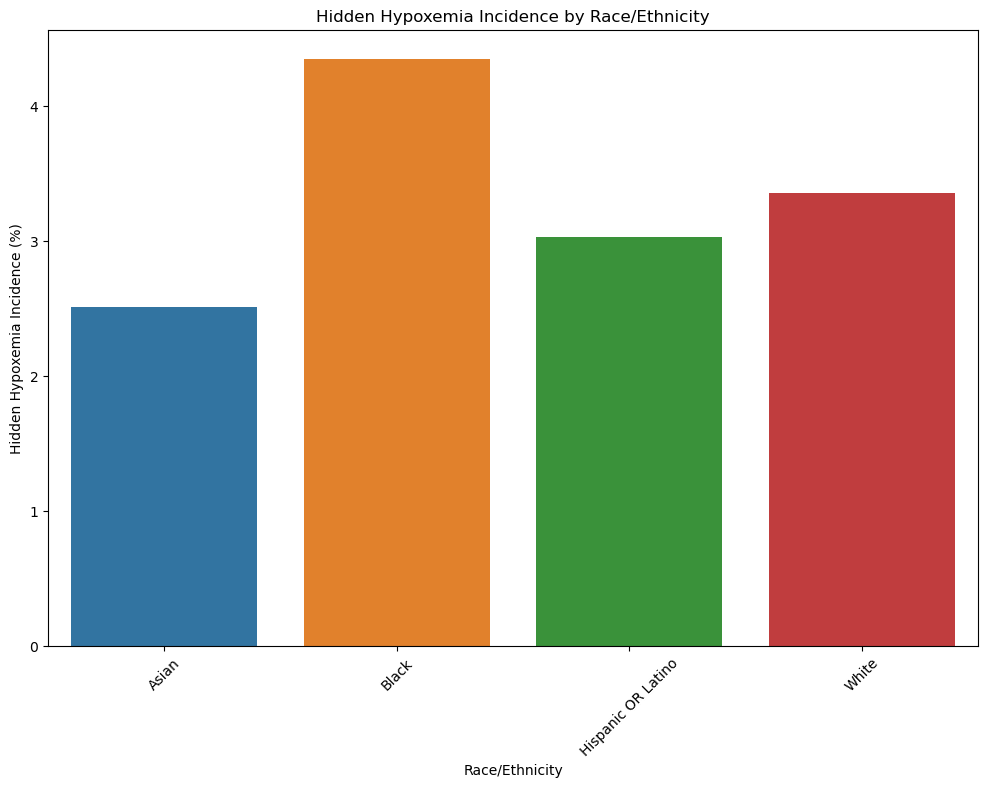

In [43]:
 # Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='race_ethnicity', y='hidden_hypoxemia_incidence', data=hidden_hypoxemia_by_race)
plt.title('Hidden Hypoxemia Incidence by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Hidden Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)

plt.show()

Observation: The higher incidence of hidden hypoxemia in Black patients further supports the notion of bias in SpO2 measurements. Pulse oximeters may be less accurate for individuals with darker skin, resulting in normal SpO2 readings despite low SaO2 levels. This can lead to missed diagnoses and delayed treatment for hypoxemia.

### Conclusion: 

* Objective: To identify hidden hypoxemia by considering both SpO2 and SaO2 measurements and to compare its incidence across different racial/ethnic groups.
* Findings: The analysis of hidden hypoxemia shows even more pronounced disparities, with Black patients having the highest incidence.
* Implication: The high incidence of hidden hypoxemia in Black patients indicates that relying solely on SpO2 can miss cases of low blood oxygen levels, particularly in this group. This highlights the importance of considering SaO2 measurements to ensure accurate diagnosis and treatment.

The analysis highlights the importance of considering both SpO2 and SaO2 measurements in clinical settings, especially for patients from racial/ethnic groups that may be more susceptible to inaccuracies in SpO2 readings.

# Part 2: Modeling 

## SpO2 modifications - including the bias 
This first step is important in the tutorial as it simulates the impact of a known bias in medical devices, specifically pulse oximeters, which often overestimate blood oxygen levels in Black patients. By artificially increasing SpO2 values for Black patients by 10%, we create a dataset that exaggerates this bias. This allows us to analyze how such inaccuracies affect downstream clinical predictions, such as mortality, and highlights the need for fair and accurate data in healthcare machine learning models. This step sets the stage for understanding the broader implications of hidden biases in medical data.


In [44]:
# Display the baseline distribution of SpO2
print("Baseline SpO2 Distribution:")
print(df_final_clean['SpO2'].describe())

Baseline SpO2 Distribution:
count    40929.000000
mean        97.148525
std          3.830732
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: SpO2, dtype: float64


In [54]:
# Add bias to Black patients' SpO2
delta_to_add = 10

df_final_clean['SpO2_biased'] = df_final_clean.apply(
    lambda row: min(row['SpO2'] + delta_to_add, 100) if row['race_ethnicity'] == 'Black' else row['SpO2'],
    axis=1
)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_13056/3171181742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['SpO2_biased'] = df_final_clean.apply(


In [57]:
# Compare both distributions for Black patients before and after modification
print("Before modification:")
print(df_final_clean.loc[df_final_clean['race_ethnicity'] == 'Black', 'SpO2'].describe())

print ("\n")
print("After modification:")
print(df_final_clean.loc[df_final_clean['race_ethnicity'] == 'Black', 'SpO2_biased'].describe())


Before modification:
count    4252.000000
mean       97.709313
std         3.876860
min        70.000000
25%        97.000000
50%        99.000000
75%       100.000000
max       100.000000
Name: SpO2, dtype: float64


After modification:
count    4252.000000
mean       99.737300
std         1.668728
min        80.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: SpO2_biased, dtype: float64


There is a 1% difference in the median which shows the impact of the introduced bias. 
N.B: The median is derived from the .describe() function, which provides various statistical summaries of the data, including the median (50% value).

## Train Test split 

In [62]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split (df_final_clean, test_size = 0.2, random_state = 42)

In [63]:
print("Shape of the training data", data_train.shape)
print("Shape of the testing data", data_test.shape)

Shape of the training data (32743, 47)
Shape of the testing data (8186, 47)


### Check balancing of the mortality outcome
The goal of checking the mean of hospital_death in the overall dataset, training set, and test set is to ensure that the distribution of the target variable (in-hospital mortality) is balanced across these subsets. This helps to verify that the data splitting process did not introduce any bias, ensuring the model will be trained and evaluated on representative samples.

In [66]:
print(df_final_clean.in_hospital_mortality.mean())
print(data_train.in_hospital_mortality.mean()) 
print(data_test.in_hospital_mortality.mean())

0.18194922915292336
0.18025226766026325
0.18873686782311264


They should not be too different as we need to ensure that the proportions of the target variable are similar across the overall dataset, training set, and test set helps in building a model that is more likely to generalize well and provides accurate performance metrics.

## Multivariate Logistic Regression Model 

The goal of comparing the performance of this model with and without the biased SpO2 variable is to understand the impact of this bias on the accuracy and fairness of mortality predictions. Specifically, we aim to see how the bias in SpO2 values for Black patients affects the model's ability to correctly predict in-hospital mortality across different racial and ethnic groups.



- **Purpose of Multivariate Logistic Regression**: To assess binary outcomes, such as whether a patient experienced in-hospital mortality (yes/no).
- **Why**: Logistic regression is suitable for binary dependent variables. It allows the researchers to determine the odds of a particular outcome occurring (e.g., in-hospital mortality) based on several independent variables (covariates), such as age, sex, SOFA score, and presence of hidden hypoxemia. By using logistic regression, the paper can quantify how hidden hypoxemia, along with other factors, influences the likelihood of in-hospital mortality. This helps in understanding the severity and implications of undetected low oxygen levels.

In [146]:
# Define the outcome column
outcome = ['in_hospital_mortality']

In [147]:
y_train = data_train[outcome]
y_test = data_test[outcome]

In [148]:
# Select features to use 
features_original = [
     #Demographics 
            'admission_age', 'sex_female',
     # Clinical Measurements 
            'BMI_admission', 'SaO2', 'SpO2', 
    # Clinical Scores 
            'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'comorbidity_score_value', 
    # hospital data 
             'los_ICU', 'los_hospital', 'hidden_hypoxemia'
]

# Define features for the biased model (using SpO2_biased instead of SpO2)
features_biased = [
    'admission_age', 'sex_female', 'BMI_admission', 'SpO2_biased', 'SaO2', 
    'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'comorbidity_score_value', 
    'los_ICU', 'los_hospital'
]



# is added more variables needed? 'datetime_icu_admit', 'datetime_icu_discharge',

In [149]:
# Split data into training and testing sets
X_train_original = data_train[features_original]
X_test_original = data_test[features_original]
X_train_biased = data_train[features_biased]
X_test_biased = data_test[features_biased]

In [150]:
# Initialize and train the logistic regression model on original data
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train_original, y_train.values.ravel())

# Make predictions on the test set using the original model
y_pred_original = model_original.predict(X_test_original)

# Initialize and train the logistic regression model on biased data
model_biased = LogisticRegression(max_iter=1000)
model_biased.fit(X_train_biased, y_train.values.ravel())

# Make predictions on the test set using the biased model
y_pred_biased = model_biased.predict(X_test_biased)

In [151]:
# Output the accuracy and classification report for both models
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_biased = accuracy_score(y_test, y_pred_biased)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print('Classification Report (Original Data):')
print(classification_report(y_test, y_pred_original))

print(f'Accuracy (Biased Data): {accuracy_biased:.2f}')
print('Classification Report (Biased Data):')
print(classification_report(y_test, y_pred_biased))

Accuracy (Original Data): 0.82
Classification Report (Original Data):
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      6641
         1.0       0.67      0.14      0.23      1545

    accuracy                           0.82      8186
   macro avg       0.75      0.56      0.56      8186
weighted avg       0.80      0.82      0.77      8186

Accuracy (Biased Data): 0.83
Classification Report (Biased Data):
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      6641
         1.0       0.68      0.14      0.23      1545

    accuracy                           0.83      8186
   macro avg       0.76      0.56      0.57      8186
weighted avg       0.80      0.83      0.77      8186



Feature Importance (Original Data):
                     Feature  Importance
6   sofa_future_overall_24hr    0.153308
9                    los_ICU    0.090275
5     sofa_past_overall_24hr    0.075847
7    comorbidity_score_value    0.036144
8    comorbidity_score_value    0.036144
0              admission_age    0.016578
3                       SaO2    0.010437
11          hidden_hypoxemia    0.002834
1                 sex_female    0.002183
2              BMI_admission    0.000001
4                       SpO2   -0.050929
10              los_hospital   -0.086820
Feature Importance (Biased Data):
                     Feature  Importance
6   sofa_future_overall_24hr    0.153222
9                    los_ICU    0.090265
5     sofa_past_overall_24hr    0.076184
7    comorbidity_score_value    0.036396
8    comorbidity_score_value    0.036396
0              admission_age    0.016327
4                       SaO2    0.004896
1                 sex_female    0.002177
2              BMI_admission

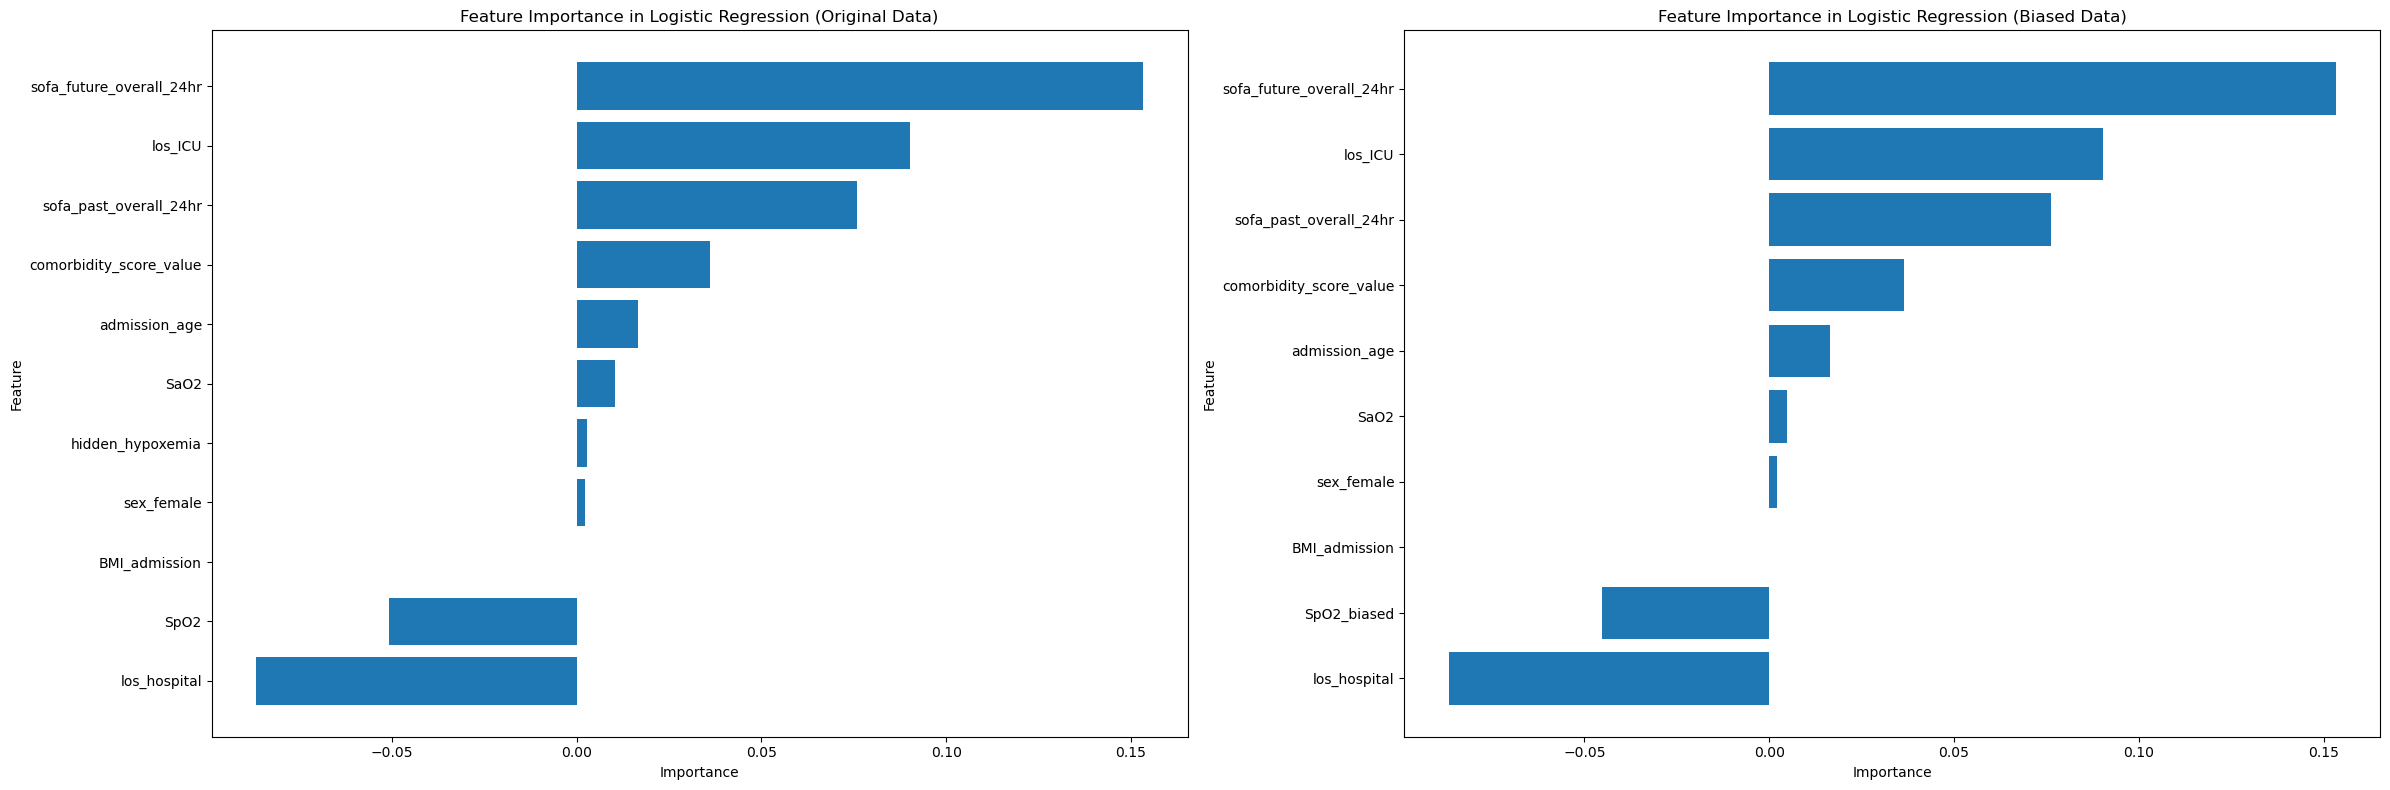

In [152]:
# Get the feature importance for the original model
feature_importance_original = pd.DataFrame({
    'Feature': X_train_original.columns,
    'Importance': model_original.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Original Data):")
print(feature_importance_original)

# Get the feature importance for the biased model
feature_importance_biased = pd.DataFrame({
    'Feature': X_train_biased.columns,
    'Importance': model_biased.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Biased Data):")
print(feature_importance_biased)

# Plotting feature importance for both models side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot feature importance for the original model
axs[0].barh(feature_importance_original['Feature'], feature_importance_original['Importance'])
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Feature')
axs[0].set_title('Feature Importance in Logistic Regression (Original Data)')
axs[0].invert_yaxis()

# Plot feature importance for the biased model
axs[1].barh(feature_importance_biased['Feature'], feature_importance_biased['Importance'])
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].set_title('Feature Importance in Logistic Regression (Biased Data)')
axs[1].invert_yaxis()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [153]:
# Evaluate model across races for original model
evaluation_df_original = X_test_original.copy()
evaluation_df_original['y_test'] = y_test.values
evaluation_df_original['y_pred'] = y_pred_original
evaluation_df_original['race_ethnicity'] = data_test['race_ethnicity'].values

group_reports_original = {}
for group in evaluation_df_original['race_ethnicity'].unique():
    group_data = evaluation_df_original[evaluation_df_original['race_ethnicity'] == group]
    y_test_group = group_data['y_test']
    y_pred_group = group_data['y_pred']
    report = classification_report(y_test_group, y_pred_group, output_dict=True)
    group_reports_original[group] = report
    print(f"Classification Report for {group} (Original Data):")
    print(classification_report(y_test_group, y_pred_group))

# Evaluate model across races for biased model
evaluation_df_biased = X_test_biased.copy()
evaluation_df_biased['y_test'] = y_test.values
evaluation_df_biased['y_pred'] = y_pred_biased
evaluation_df_biased['race_ethnicity'] = data_test['race_ethnicity'].values

group_reports_biased = {}
for group in evaluation_df_biased['race_ethnicity'].unique():
    group_data = evaluation_df_biased[evaluation_df_biased['race_ethnicity'] == group]
    y_test_group = group_data['y_test']
    y_pred_group = group_data['y_pred']
    report = classification_report(y_test_group, y_pred_group, output_dict=True)
    group_reports_biased[group] = report
    print(f"Classification Report for {group} (Biased Data):")
    print(classification_report(y_test_group, y_pred_group))

# # Create a summary DataFrame for original and biased models
# summary_original = pd.DataFrame(group_reports_original).transpose()
# summary_biased = pd.DataFrame(group_reports_biased).transpose()

# # Display the summary DataFrames with pandas styling
# summary_original_styled = summary_original.style.set_caption("Classification Report Summary (Original Data)").background_gradient()
# summary_biased_styled = summary_biased.style.set_caption("Classification Report Summary (Biased Data)").background_gradient()

# display(summary_original_styled)
# display(summary_biased_styled)


Classification Report for White (Original Data):
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      5546
         1.0       0.68      0.14      0.23      1281

    accuracy                           0.83      6827
   macro avg       0.76      0.56      0.57      6827
weighted avg       0.80      0.83      0.78      6827

Classification Report for Black (Original Data):
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       665
         1.0       0.63      0.14      0.23       155

    accuracy                           0.82       820
   macro avg       0.73      0.56      0.57       820
weighted avg       0.79      0.82      0.77       820

Classification Report for Hispanic OR Latino (Original Data):
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       321
         1.0       0.65      0.14      0.23        80

    accuracy          

Reminder: 

* Precision: Measures how many of the predicted positive cases (patients predicted to die) are actually positive. High precision indicates fewer false positives, meaning the model is more accurate in predicting deaths.

* Recall: Measures how many of the actual positive cases (patients who actually died) are predicted correctly. High recall indicates fewer false negatives, meaning the model is effective in identifying deaths.

* F1-Score: The harmonic mean of precision and recall, providing a balance between the two. A higher F1-score indicates a better balance between precision and recall.

* Support: The number of actual occurrences of the class in the dataset. It shows the distribution of classes within the data, helping understand how class imbalance might affect the model's performance.

* Accuracy: The overall proportion of correctly predicted cases (both deaths and survivals) out of all cases. High accuracy suggests the model is generally reliable, but it can be misleading in the presence of class imbalance.

* Macro Avg: Averages the metric across all classes, treating each class equally. This helps understand the model's performance across different groups regardless of class imbalance.

* Weighted Avg: Averages the metric across all classes, weighting each by its support (number of instances). This provides a more realistic evaluation when there is class imbalance.

# Conclusion: 
The tutorial demonstrates the critical importance of understanding the origins and potential biases of the variables used in clinical measurements. By revealing the limitations of relying solely on SpO2, it highlights how combining SpO2 with SaO2 provides a more accurate and equitable assessment of patients' oxygen levels. 